# LabelMaster Sales Data EDA
In this notebook we try to find seasonality in the data according to month.
Uses a dataset that we got from DataPrep Notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/LabelMaster/LabelMaster Data/concatenated_sales_data.csv")

The Date column here is an object. We need to convert it to DateTime format.

In [6]:
df.dtypes

Unnamed: 0              int64
Department Dim          int64
Product Group Code    float64
Posting Date           object
Sum of Sales          float64
dtype: object

In [15]:
df['Posting Date']

0          1993-01-04 00:00:00
1          1993-01-04 00:00:00
2          1993-01-04 00:00:00
3          1993-01-04 00:00:00
4          1993-01-04 00:00:00
                  ...         
1266114    2020-10-31 00:00:00
1266115    2020-10-31 00:00:00
1266116    2020-10-31 00:00:00
1266117    2020-10-31 00:00:00
1266118    2020-10-31 00:00:00
Name: Posting Date, Length: 1266119, dtype: object

In [28]:
# Convert the Date column to DateTime format
df["Date"] = pd.to_datetime(df['Posting Date'], format="%Y-%m-%d %H:%M:%S")

#Drop the Posting Date column
df.drop('Posting Date',axis = 1,inplace=True)
df.dtypes

Unnamed: 0                     int64
Department Dim                 int64
Product Group Code           float64
Sum of Sales                 float64
Date                  datetime64[ns]
dtype: object

In [29]:
# Filter out the departments that we wish to work on according to the Department Dim code.
filtered_df = df[(df["Department Dim"] == 504 ) | (df["Department Dim"] == 506)]

In [30]:
filtered_df.head()

,Unnamed: 0,Department Dim,Product Group Code,Sum of Sales,Date
3,5,506,50600.0,129.76,1993-01-04
4,6,506,51008.0,43.00,1993-01-04
8,10,506,NaN,5904.97,1993-01-05
13,15,506,50607.0,155.40,1993-01-06
14,16,506,50608.0,37.08,1993-01-06


Now we find the sum of sales by month to get an overview of how the trends per month.

In [31]:
# Create a dataframe for sum of sales by each month according to the department dimension
sales_by_month = pd.DataFrame(filtered_df.set_index("Date").groupby("Department Dim")["Sum of Sales"].resample("M").sum())
sales_by_month

Sum of Sales
Department Dim Date                    
504            1993-01-31     236875.51
               1993-02-28     389034.46
               1993-03-31     221486.85
               1993-04-30     331739.09
               1993-05-31     325079.50
...                                 ...
506            2020-09-30     980476.36
               2020-10-31     922901.36
               2020-11-30     293486.93
               2020-12-31     557010.14
               2021-01-31      78188.86

[674 rows x 1 columns]

In [32]:
#Reset the indices for the dataframe
sales_by_month.reset_index(inplace=True)

In [9]:
sales_by_month[sales_by_month["Department Dim"] == 506].groupby([sales_by_month["Date"].dt.year,sales_by_month["Date"].dt.month])["Sum of Sales"].max()

Date  Date
1993  1       263979.80
      2       224439.85
      3       245191.23
      4       244614.47
      5       212929.28
                ...    
2020  9       980476.36
      10      922901.36
      11      293486.93
      12      557010.14
2021  1        78188.86
Name: Sum of Sales, Length: 337, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average Sales')

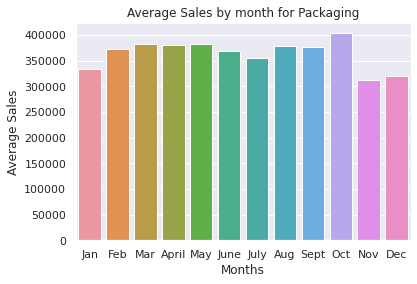

In [46]:
# Average sum of Sales by month for Department
dept_sales = sales_by_month[sales_by_month["Department Dim"] == 506].groupby(sales_by_month["Date"].dt.month)["Sum of Sales"].mean()

sns.set_theme()

months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]

sns.barplot(months,dept_sales)
plt.title("Average Sales by month for Packaging")
plt.xlabel("Months")
plt.ylabel("Average Sales")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average Sales')

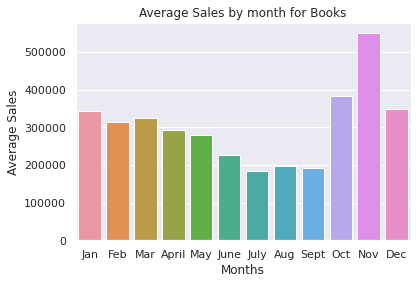

In [47]:
# Average sum of Sales by month for Books Department
sns.set_theme()

books_sales = sales_by_month[sales_by_month["Department Dim"] == 504].groupby(sales_by_month["Date"].dt.month)["Sum of Sales"].mean()

sns.barplot(months,books_sales)
plt.title("Average Sales by month for Books")
plt.xlabel("Months")
plt.ylabel("Average Sales")

From the plots above, we can see that there is seasonality in the data for both the departments and on average, we see a rise of sales in the last quater of the year.